In [31]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [32]:
mat = sio.loadmat('Annotations/Annotations.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'test', 'train', 'val'])

In [33]:
train = pd.DataFrame(mat['train'][0])
test = pd.DataFrame(mat['test'][0])
validation = pd.DataFrame(mat['val'][0])
train.columns

Index(['filename', 'folder', 'image_size', 'original_database', 'person'], dtype='object')

In [34]:
# TODO: get to know how to extract the atributes from the annotations
# TODO: describe the distribution of the data

In [35]:
train['folder'] = train.apply(lambda x: x['folder'][0], axis=1)
train['filename'] = train.apply(lambda x: x['filename'][0], axis=1)
df = pd.concat([train['folder'], train['filename']], axis=1)
paths = df.apply(lambda x: "./emotic/" +os.path.join(x['folder'], x['filename']), axis=1)

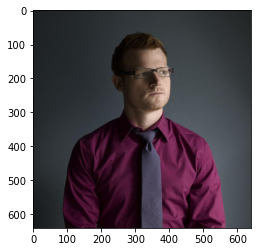

In [36]:
paths.shape
plt.imshow(plt.imread(paths[0]))

In [37]:
print(train['person'][2][0][0][1][0][0][0][0].tolist())

[array(['Engagement'], dtype='<U10'), array(['Excitement'], dtype='<U10'), array(['Happiness'], dtype='<U9')]


In [38]:
print(train['person'][3][0][0][1][0][0][0][0][0][0])

Aversion


In [39]:
train['bbox'] = train.apply(lambda x: x['person'][0][0][0][0], axis=1)
train['paths'] = paths
train['discrete_emotion'] = train.apply(lambda x: [x['person'][0][0][1][0][0][0][0][0][0]] if (len(x['person'][0][0][1][0][0][0][0]) == 1) else [x['person'][0][0][1][0][0][0][0][0][0], x['person'][0][0][1][0][0][0][0][1][0]] if (len(x['person'][0][0][1][0][0][0][0]) == 2) else [x['person'][0][0][1][0][0][0][0][0][0], x['person'][0][0][1][0][0][0][0][1][0], x['person'][0][0][1][0][0][0][0][2][0]] , axis=1)
train['continous_emotion'] = train.apply(lambda x: [x['person'][0][0][2][0][0][0][0][0], x['person'][0][0][2][0][0][1][0][0], x['person'][0][0][2][0][0][2][0][0]], axis=1)

In [40]:
train.drop(columns = {"filename", "folder", "image_size", "original_database", "person"}, axis=1, inplace=True)

In [41]:
print(type(train['continous_emotion'][279][0]) == np.float64)
# drop all rows where any of the emotions is NaN
train = train[~train['continous_emotion'].apply(lambda x: np.isnan(x).any())]

True


In [42]:
train.dropna()

,bbox,paths,discrete_emotion,continous_emotion
0,"[86, 58, 564, 628]",./emotic/mscoco/images/COCO_val2014_0000005622...,"[Disconnection, Doubt/Confusion]","[5, 3, 9]"
1,"[485, 149, 605, 473]",./emotic/mscoco/images/COCO_train2014_00000028...,[Anticipation],"[6, 4, 7]"
2,"[305, 92, 461, 465]",./emotic/mscoco/images/COCO_val2014_0000005581...,"[Engagement, Excitement, Happiness]","[7, 8, 8]"
3,"[221, 63, 448, 372]",./emotic/mscoco/images/COCO_train2014_00000036...,"[Aversion, Pleasure]","[8, 9, 8]"
4,"[44, 143, 150, 288]",./emotic/mscoco/images/COCO_train2014_00000021...,"[Confidence, Excitement]","[7, 9, 10]"
...,...,...,...,...
17072,"[189, 194, 323, 438]",./emotic/mscoco/images/COCO_val2014_0000002037...,"[Anticipation, Engagement]","[6, 5, 3]"
17073,"[214, 48, 340, 326]",./emotic/mscoco/images/COCO_train2014_00000017...,[Confidence],"[7, 8, 7]"
17074,"[166, 35, 341, 401]",./emotic/mscoco/images/COCO_val2014_0000005140...,"[Anticipation, Engagement, Excitement]","[6, 2, 10]"
17075,"[245.0, 227.0, 293.0, 340.0]",./emotic/framesdb/images/frame_k7fb824vh221kl3...,[Engagement],"[5, 5, 6]"


In [44]:
train

,bbox,paths,discrete_emotion,continous_emotion
0,"[86, 58, 564, 628]",./emotic/mscoco/images/COCO_val2014_0000005622...,"[Disconnection, Doubt/Confusion]","[5, 3, 9]"
1,"[485, 149, 605, 473]",./emotic/mscoco/images/COCO_train2014_00000028...,[Anticipation],"[6, 4, 7]"
2,"[305, 92, 461, 465]",./emotic/mscoco/images/COCO_val2014_0000005581...,"[Engagement, Excitement, Happiness]","[7, 8, 8]"
3,"[221, 63, 448, 372]",./emotic/mscoco/images/COCO_train2014_00000036...,"[Aversion, Pleasure]","[8, 9, 8]"
4,"[44, 143, 150, 288]",./emotic/mscoco/images/COCO_train2014_00000021...,"[Confidence, Excitement]","[7, 9, 10]"
...,...,...,...,...
17072,"[189, 194, 323, 438]",./emotic/mscoco/images/COCO_val2014_0000002037...,"[Anticipation, Engagement]","[6, 5, 3]"
17073,"[214, 48, 340, 326]",./emotic/mscoco/images/COCO_train2014_00000017...,[Confidence],"[7, 8, 7]"
17074,"[166, 35, 341, 401]",./emotic/mscoco/images/COCO_val2014_0000005140...,"[Anticipation, Engagement, Excitement]","[6, 2, 10]"
17075,"[245.0, 227.0, 293.0, 340.0]",./emotic/framesdb/images/frame_k7fb824vh221kl3...,[Engagement],"[5, 5, 6]"


<BarContainer object of 10 artists>

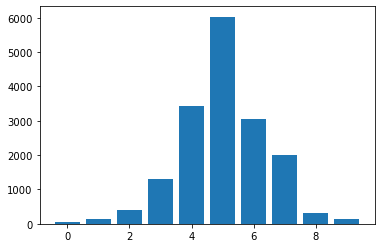

In [61]:
continous_emotion_valance = [0,0,0,0,0,0,0,0,0,0]
for row, emotion in train.iterrows():
        continous_emotion_valance[emotion['continous_emotion'][0]-1] += 1 
# plot the distribution of the emotions and label them
plt.bar(range(len(continous_emotion_valance)), continous_emotion_valance)

<BarContainer object of 10 artists>

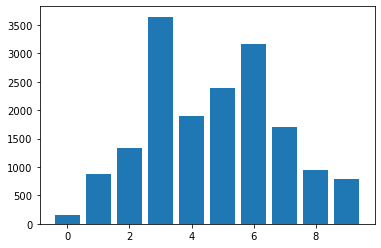

In [62]:
continous_emotion_valance = [0,0,0,0,0,0,0,0,0,0]
for row, emotion in train.iterrows():
        continous_emotion_valance[emotion['continous_emotion'][1]-1] += 1 
# plot the distribution of the emotions and label them
plt.bar(range(len(continous_emotion_valance)), continous_emotion_valance)

<BarContainer object of 10 artists>

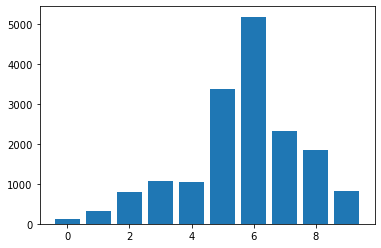

In [63]:
continous_emotion_valance = [0,0,0,0,0,0,0,0,0,0]
for row, emotion in train.iterrows():
        continous_emotion_valance[emotion['continous_emotion'][2]-1] += 1 
# plot the distribution of the emotions and label them
plt.bar(range(len(continous_emotion_valance)), continous_emotion_valance)

In [ ]:
# delete all rows where any of the continous emotions is a float
train = train[train['continous_emotion'].apply(lambda x: type(x[0]) == np.float64)]
train

,bbox,paths,discrete_emotion,continous_emotion
263,"[57.0, 48.0, 617.0, 281.0]",./emotic/framesdb/images/frame_hxrt3v35rhil6sx...,"[Fatigue, Peace]","[nan, nan, nan]"
279,"[136.0, 189.0, 578.0, 816.0]",./emotic/framesdb/images/frame_dro0zgb34a2kepg...,"[Anticipation, Engagement, Excitement]","[nan, nan, nan]"
374,"[240.0, 203.0, 339.0, 487.0]",./emotic/framesdb/images/frame_57juemniopi37pn...,"[Confidence, Engagement]","[nan, nan, nan]"
438,"[566.0, 289.0, 645.0, 540.0]",./emotic/framesdb/images/frame_7s5y7yti09w5wwo...,"[Engagement, Happiness, Pleasure]","[nan, nan, nan]"
632,"[8.0, 123.0, 651.0, 1143.0]",./emotic/framesdb/images/frame_d895n51heeh53dr...,"[Confidence, Disconnection]","[nan, nan, nan]"
...,...,...,...,...
16684,"[645.0, 39.0, 1002.0, 618.0]",./emotic/framesdb/images/frame_cgekghkin9mfe1i...,"[Affection, Engagement]","[nan, nan, nan]"
16845,"[3079.0, 1324.0, 4402.0, 3498.0]",./emotic/framesdb/images/frame_gbmefn2m2r4aa6t...,[Engagement],"[nan, nan, nan]"
16861,"[19.0, 187.0, 140.0, 411.0]",./emotic/framesdb/images/frame_81ywrqgcwmx0fat...,[Suffering],"[nan, nan, nan]"
16925,"[1323.0, 1404.0, 1986.0, 2811.0]",./emotic/framesdb/images/frame_71b2b7c534xb1qn...,[Disconnection],"[nan, nan, nan]"


<BarContainer object of 10 artists>

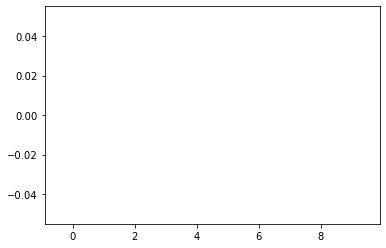

In [ ]:
# graph the distribution of the train['continous_emotion'], just intiger values